# Random Forest for Image Classification (Digits Dataset)

This notebook builds a **Random Forest classifier** for image classification
using the handwritten digits dataset from scikit-learn.

It is designed for students as a follow-up to the **Decision Tree** notebook.

### What you will learn
- How a Random Forest extends the idea of a single Decision Tree
- How to train a RandomForestClassifier on image data
- How to evaluate its performance
- How to inspect feature (pixel) importance

We use the same **digits dataset** (8×8 grayscale images of digits 0–9).

In [1]:
# ==========================================
# 1. Import the required libraries
# ==========================================
# This is similar to the Decision Tree example, but we now also
# import RandomForestClassifier.

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

%matplotlib inline

print("Libraries imported successfully.")

Libraries imported successfully.


## 2. Load and inspect the digits dataset

We again use `load_digits` from scikit-learn.

Each sample consists of:
- An **8×8 grayscale image** of a handwritten digit (0–9)
- A corresponding **label** (the digit)


In [2]:
# ==========================================
# 2. Load the digits dataset
# ==========================================

digits = load_digits()
images = digits.images  # shape: (n_samples, 8, 8)
labels = digits.target  # shape: (n_samples,)

print("Images shape:", images.shape)
print("Labels shape:", labels.shape)
print("Unique labels:", np.unique(labels))

Images shape: (1797, 8, 8)
Labels shape: (1797,)
Unique labels: [0 1 2 3 4 5 6 7 8 9]


## 3. Visualize some sample images

As before, we preview a few images to understand the data.


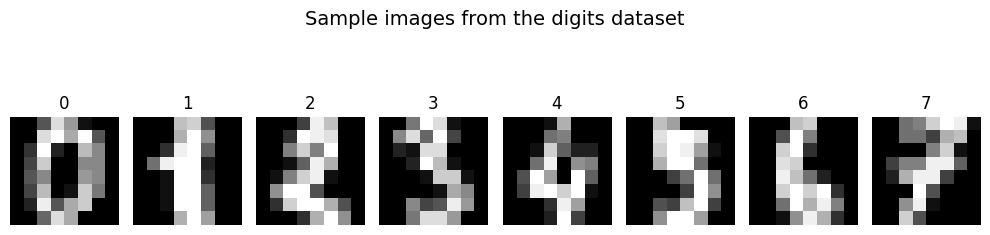

In [3]:
# ==========================================
# 3. Show sample images with labels
# ==========================================

num_samples_to_show = 8
plt.figure(figsize=(10, 3))

for i in range(num_samples_to_show):
    plt.subplot(1, num_samples_to_show, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.axis('off')
    plt.title(labels[i])

plt.suptitle("Sample images from the digits dataset", fontsize=14)
plt.tight_layout()
plt.show()

## 4. Prepare the data for the Random Forest

Random Forests in scikit-learn expect a 2D feature matrix `X`:

`(number_of_samples, number_of_features)`

So we will:
1. Flatten each 8×8 image into a vector of length 64.
2. Split the data into **training** and **test** sets.


In [4]:
# ==========================================
# 4. Flatten images and create train/test split
# ==========================================

n_samples = images.shape[0]
X = images.reshape((n_samples, -1))  # shape: (n_samples, 64)
y = labels

print("Flattened X shape:", X.shape)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])

Flattened X shape: (1797, 64)
Training set size: 1437
Test set size: 360


## 5. What is a Random Forest?

A **Random Forest** is an ensemble of many Decision Trees.

Key ideas:
- Train many trees on slightly different versions of the data (using bootstrapping).
- At each split, each tree considers only a random subset of features (pixels).
- Final prediction is made by **majority vote** of all trees.

Benefits:
- Usually **more accurate** than a single tree.
- More **robust** to noise and overfitting.

**Note:** Bootstrapping is a resampling technique where we create new training sets by sampling with replacement from the original dataset.


## 6. Train the Random Forest classifier

We create a `RandomForestClassifier` with some basic settings:
- `n_estimators=100`: number of trees in the forest
- `max_depth=None`: trees can grow until all leaves are pure or too small
- `random_state=42`: for reproducible results


In [5]:
# ==========================================
# 6. Create and train the Random Forest model
# ==========================================

rf_clf = RandomForestClassifier(
    n_estimators=100,   # number of trees
    max_depth=None,     # let trees grow fully (can be tuned)
    random_state=42,
    n_jobs=-1           # use all available CPU cores for speed
)

rf_clf.fit(X_train, y_train)

print("Random Forest model trained successfully.")

Random Forest model trained successfully.


## 7. Evaluate the Random Forest

We evaluate the model similarly to the Decision Tree:
- Training and test **accuracy**
- **Classification report** for the test set
- **Confusion matrix** for the test set


In [6]:
# ==========================================
# 7a. Accuracy and classification report
# ==========================================

y_train_pred = rf_clf.predict(X_train)
y_test_pred = rf_clf.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training accuracy: {train_accuracy:.4f}")
print(f"Test accuracy:     {test_accuracy:.4f}")

print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred))

Training accuracy: 1.0000
Test accuracy:     0.9611

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        36
           1       0.90      0.97      0.93        36
           2       1.00      0.97      0.99        35
           3       0.97      0.97      0.97        37
           4       0.97      0.97      0.97        36
           5       0.97      1.00      0.99        37
           6       1.00      0.97      0.99        36
           7       0.92      1.00      0.96        36
           8       0.94      0.86      0.90        35
           9       0.97      0.92      0.94        36

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



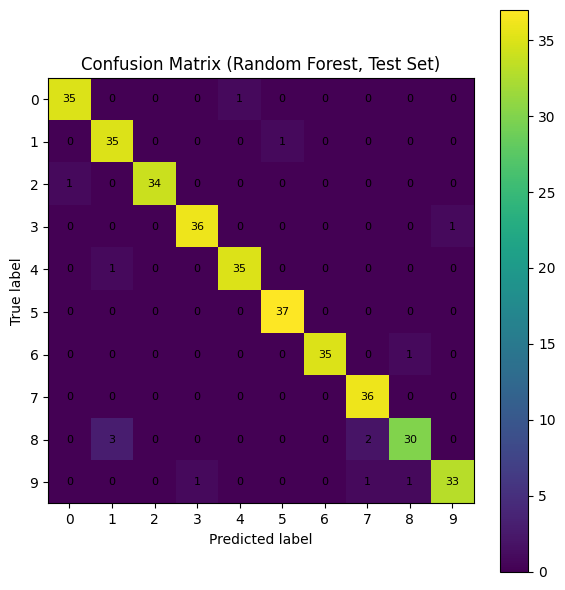

In [7]:
# ==========================================
# 7b. Confusion matrix
# ==========================================

cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest')
plt.title("Confusion Matrix (Random Forest, Test Set)")
plt.colorbar()
plt.xlabel("Predicted label")
plt.ylabel("True label")

tick_marks = np.arange(10)
plt.xticks(tick_marks, tick_marks)
plt.yticks(tick_marks, tick_marks)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j],
                 horizontalalignment='center',
                 verticalalignment='center',
                 fontsize=8)

plt.tight_layout()
plt.show()

## 8. Visualize some test predictions

We again look at a few test images and compare:
- True label
- Predicted label (Random Forest)


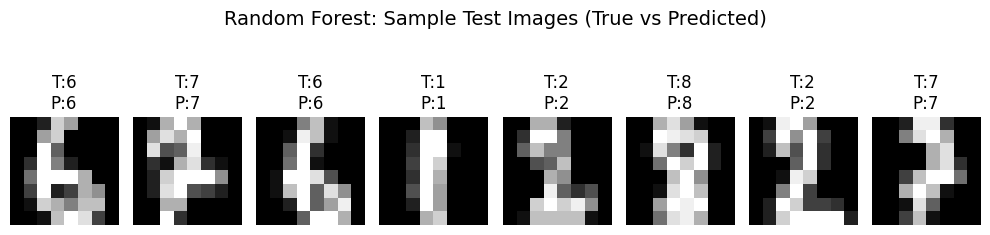

In [8]:
# ==========================================
# 8. Show sample test images with predictions
# ==========================================

num_to_show = 8
np.random.seed(0)
indices = np.random.choice(len(X_test), size=num_to_show, replace=False)

plt.figure(figsize=(10, 3))

for i, idx in enumerate(indices):
    image = X_test[idx].reshape(8, 8)
    true_label = y_test[idx]
    pred_label = y_test_pred[idx]

    plt.subplot(1, num_to_show, i + 1)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.title(f"T:{true_label}\nP:{pred_label}")

plt.suptitle("Random Forest: Sample Test Images (True vs Predicted)", fontsize=14)
plt.tight_layout()
plt.show()

## 9. Feature (pixel) importance

Random Forests can tell us how **important** each feature (pixel) is
for making predictions.

We will:
- Extract the feature importances
- Reshape them back into an 8×8 grid
- Plot a heatmap showing which pixels the forest found most useful


Feature importances come from Gini-based importance:

* Every time a pixel is used to split a tree node
* The tree measures how much uncertainty (impurity) drops
* That credit is added to that feature’s score
* Summed across all trees
* Normalized so everything adds up to 1.0



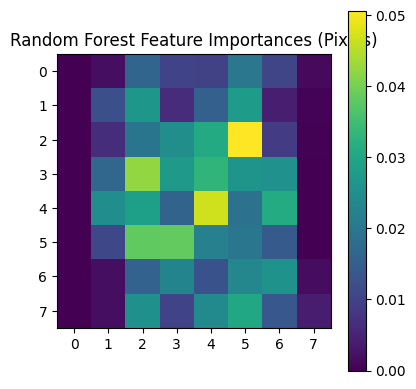

In [9]:
# ==========================================
# 9. Plot feature importances as an 8x8 heatmap
# ==========================================

importances = rf_clf.feature_importances_  # shape: (64,)
importance_grid = importances.reshape(8, 8)

plt.figure(figsize=(4, 4))
plt.imshow(importance_grid, interpolation='nearest')
plt.title("Random Forest Feature Importances (Pixels)")
plt.colorbar()
plt.xticks(range(8))
plt.yticks(range(8))
plt.tight_layout()
plt.show()

## 10. Summary

In this notebook, you:

1. Loaded and visualized the handwritten digits dataset.
2. Flattened 8×8 images into 64-dimensional feature vectors.
3. Trained a **Random Forest classifier** for image classification.
4. Evaluated the model using accuracy, classification reports, and a confusion matrix.
5. Visualized feature importances as a heatmap over pixels.

Compared to a single Decision Tree, a Random Forest usually:
- Has **better accuracy**
- Is **more robust** (less overfitting)
- Still provides some interpretability through feature importances.

You can extend this work by:
- Tuning hyperparameters (e.g., `n_estimators`, `max_depth`, `max_features`)
- Comparing performance with other models (neural networks) (We will cover in this class).
- Applying the same approach to other image datasets.